# Pyro Examples

In [ ]:
import pandas as pd
import numpy as np
from orbit.lgt import LGT
from orbit.utils.plot import plot_predicted_data
from orbit.utils.plot import plot_predicted_components

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Data

In [ ]:
DATA_FILE = "./data/iclaims_example.csv"

In [ ]:
raw_df = pd.read_csv(DATA_FILE, parse_dates=['week'])

### Train / Test Split

In [ ]:
df=raw_df.copy()
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

In [ ]:
train_df.head(5)

## MAP Fit and Predict

In [ ]:
lgt_map=LGT(
    response_col="claims",
    date_col="week",
    seasonality=52,
    seed=8888,
    inference_engine='pyro',
    predict_method='map',
    auto_scale=False,
    is_multiplicative=True
)

In [ ]:
lgt_map.fit(df=train_df)

In [ ]:
predicted_df = lgt_map.predict(df=test_df)

In [ ]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=lgt_map.date_col, actual_col=lgt_map.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## VI Fit and Predict

Pyro only support Variational Inference(SVI) for full sampling prediction.

In [11]:
lgt_vi = LGT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    num_warmup=4000, 
    num_sample=500,
    seed=8888,
    inference_engine='pyro',
    sample_method='vi',
    predict_method='full',
    n_bootstrap_draws=500
)

In [12]:
lgt_vi.fit(df=train_df)

INFO:root:Guessed max_plate_nesting = 2


step    0 loss = 5936.1, scale = 0.11918
step   10 loss = 51.32, scale = 0.16909
step   20 loss = -51.402, scale = 0.35621
step   30 loss = -291.36, scale = 0.40762
step   40 loss = -367.83, scale = 0.34514
step   50 loss = -394.57, scale = 0.38563
step   60 loss = -409.79, scale = 0.30989
step   70 loss = -416.82, scale = 0.30403
step   80 loss = -418.23, scale = 0.2984
step   90 loss = -419.78, scale = 0.29268
step  100 loss = -419.81, scale = 0.31131


In [13]:
predicted_df = lgt_vi.predict(df=test_df)

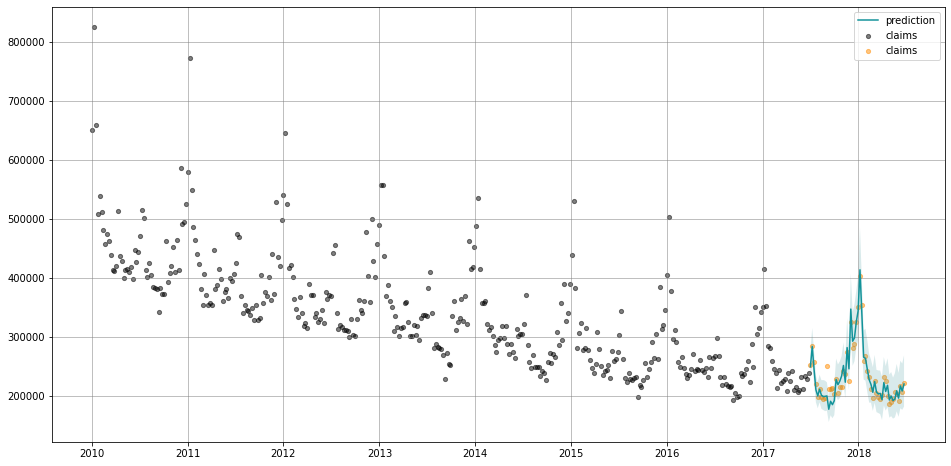

In [14]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=lgt_vi.date_col, actual_col=lgt_vi.response_col, pred_col=50, 
                    pred_quantiles_col=[5,95], test_actual_df=test_df)

## Fit with Regressors

In [29]:
lgt_reg_map=LGT(
    response_col='claims',
    regressor_col=['trend.unemploy', 'trend.filling'],
    regressor_sign=['=','='],
    date_col='week',
    seasonality=52,
    seed=8888,
    inference_engine='pyro',
    predict_method='map'
)

In [30]:
lgt_reg_map.fit(df=train_df)

step    0 loss = -226.24
step   10 loss = -483.84
step   20 loss = -523.32
step   30 loss = -536.13
step   40 loss = -540.58
step   50 loss = -544.54
step   60 loss = -544.02
step   70 loss = -545.21
step   80 loss = -544.05
step   90 loss = -546.14
step  100 loss = -546.87


In [31]:
predicted_df = lgt_reg_map.predict(df=test_df)

In [32]:
predicted_df.head(5)

,week,prediction
0,2017-07-02,249334.11763
1,2017-07-09,280939.04451
2,2017-07-16,240972.91753
3,2017-07-23,205575.34250
4,2017-07-30,196782.63625


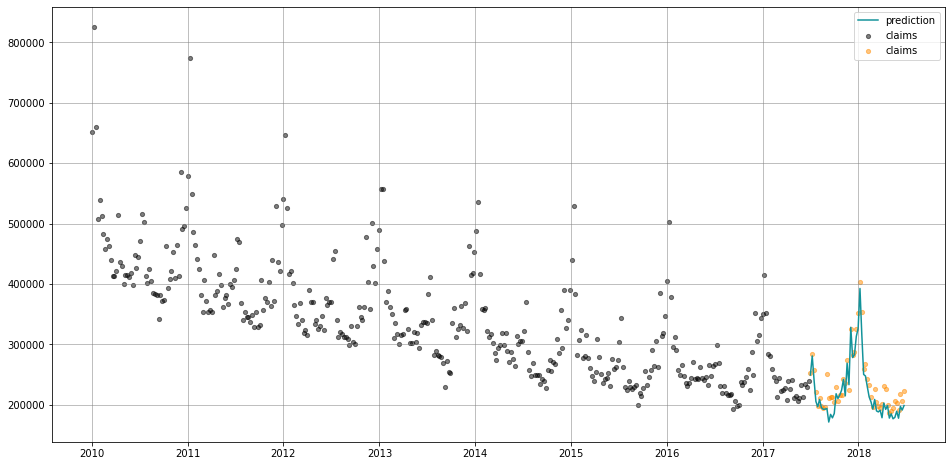

In [33]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=lgt_reg_map.date_col, actual_col=lgt_reg_map.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

In [27]:
predicted_df = lgt_reg_map.predict(df=df, decompose=True)
predicted_df.head(5)

,week,prediction,trend,seasonality,regression
0,2010-01-03,888164.98429,660600.10091,1.36386,0.98579
1,2010-01-10,2334614.39496,662763.86017,3.54750,0.99296
2,2010-01-17,675270.61871,484054.83074,1.41231,0.98777
3,2010-01-24,540464.30967,523486.40233,1.04025,0.99248
4,2010-01-31,577783.57366,520612.54435,1.12361,0.98772


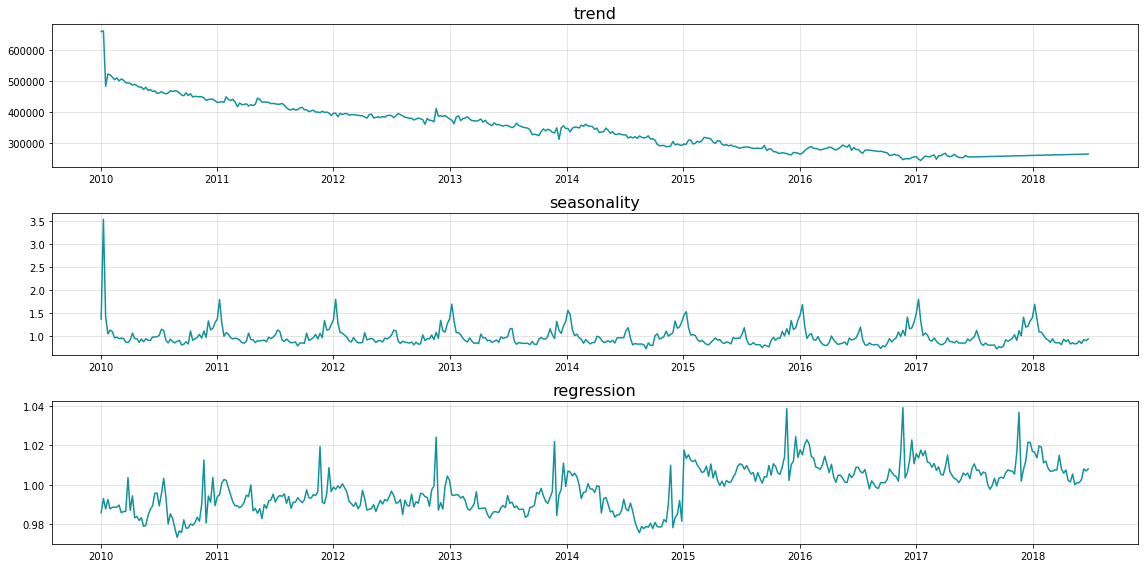

In [28]:
plot_predicted_components(predicted_df=predicted_df, date_col='week')